In [130]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

5


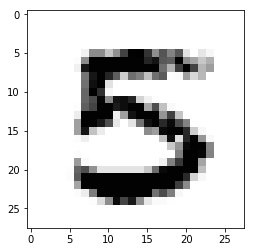

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 1206 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [134]:
x_train.shape

(60000, 28, 28)

In [112]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [139]:
x_test.shape

(10000, 28, 28)

In [140]:
y_test.shape

(10000,)

In [114]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [115]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.2103 - acc: 0.9369TA: 1:19 - loss: 0.4272 - acc:  - ETA: 1:19 - loss: 0.4208 - ac - ETA: 1:18 - loss: 0 - ETA: 1:15 - loss: 0.3986 - acc: - ETA:  -  - ETA: 1:07 - loss: 0.3554 - acc: 0.891 - ETA: 1:07 - loss: 0.3548 - acc:  - ETA: 1:07 - ETA: 8s - loss - ETA: 6s - loss - ETA: 4s - loss: 0.2144 - acc - ETA: 3s - los - ETA: 1s - loss: 0.2 - ETA: 0s - loss: 0.2104 - acc: 0.93
Epoch 2/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0872 - acc: 0.9730: 6s - loss: 0.0883 - acc: 0. - ETA: 6s - loss: 0.0883 - acc: 0. - ETA: 5s - l - ETA: - ETA: 0s - loss: 0.0873 - a
Epoch 3/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0608 - acc: 0.9804TA: 1:33 - loss: 0.0440 - ac -  - ETA: 1:29 - loss: 0.0 - ETA: 1:28 - loss: 0 - ETA: 1:26 - loss: 0.0657 - acc: 0.9 - ET
Epoch 4/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0446 - acc: 0.9859
Epoch 5/1

In [116]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 9s 897us/step


[0.05608759974873283, 0.9857]

In [141]:
x_test.shape

(10000, 28, 28)

Predicted image: 2
Original image:  AxesImage(54,36;334.8x217.44)


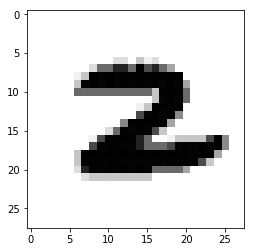

In [129]:
image_index = 4944
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted image:", pred.argmax())
print("Original image: ", plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys'))